
# 📘 KNN Student Pack (v3) — With Data Overview & Custom Predictions
Datasets: **Iris**, **Wine**, **Breast Cancer**

**Workflow:** Overview → Split/Scale → Train → Evaluate → Tune *k* → Predict → Reflect


## 0) Setup & Imports

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Setup complete")


Setup complete


## 1) Helper Functions

In [2]:

def dataset_overview(data, feature_names, target, target_names=None, target_col="target"):
    df = pd.DataFrame(data, columns=feature_names)
    df[target_col] = target
    if target_names is not None:
        df[target_col + "_name"] = df[target_col].map(dict(enumerate(target_names)))
    print("Shape:", df.shape)
    display(df.head())
    display(df.describe().round(2))
    return df

def split_scale(X, y, test_size=0.2, random_state=42, stratify=True):
    strat = y if stratify else None
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=strat
    )
    scaler = StandardScaler()
    return scaler.fit_transform(X_train), scaler.transform(X_test), y_train, y_test, scaler

def fit_knn(X_train, y_train, k=5):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model

def evaluate(model, X_test, y_test, target_names=None):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, zero_division=0))

def sweep_k(X_train, X_test, y_train, y_test, ks=range(1, 26), title="KNN Accuracy vs k"):
    scores = []
    for k in ks:
        m = KNeighborsClassifier(n_neighbors=k)
        m.fit(X_train, y_train)
        scores.append(m.score(X_test, y_test))
    plt.figure()
    plt.plot(list(ks), scores, marker='o')
    plt.title(title)
    plt.xlabel("k (neighbours)")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()
    return scores


## 2) Iris 🌸

Shape: (150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,1.00
std,0.83,0.44,1.77,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


Accuracy: 0.9333333333333333

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



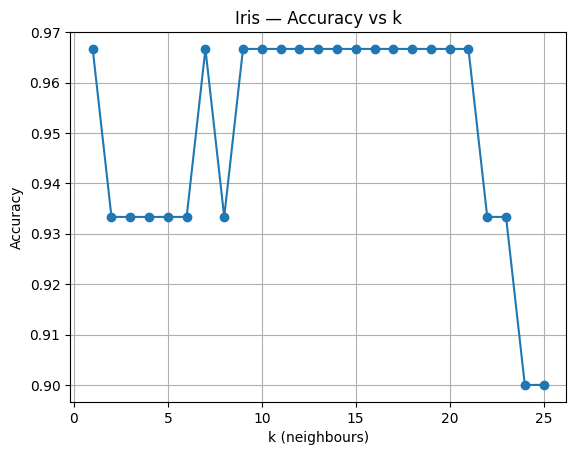

Predicted species: versicolor


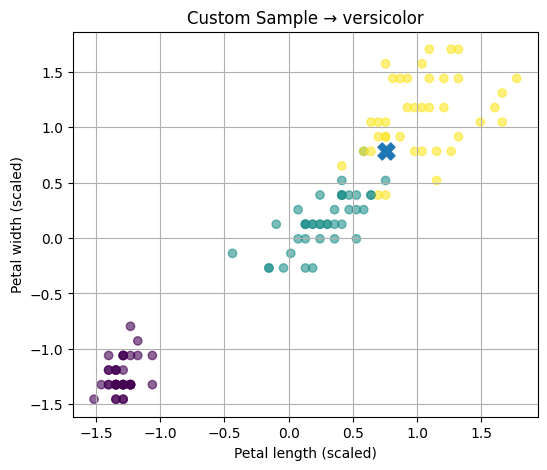

In [3]:

iris = load_iris()
df_iris = dataset_overview(iris.data, iris.feature_names, iris.target, iris.target_names, target_col="species")

X_i = df_iris.drop(columns=["species","species_name"]).values
y_i = df_iris["species"].values

Xi_tr, Xi_te, yi_tr, yi_te, scaler_i = split_scale(X_i, y_i, test_size=0.2)
model_i = fit_knn(Xi_tr, yi_tr, k=3)
evaluate(model_i, Xi_te, yi_te, target_names=iris.target_names)
_ = sweep_k(Xi_tr, Xi_te, yi_tr, yi_te, title="Iris — Accuracy vs k")

new_sample = np.array([[5.9, 3.0, 5.1, 1.8]])
pred_i = model_i.predict(scaler_i.transform(new_sample))[0]
print("Predicted species:", iris.target_names[pred_i])

plt.figure(figsize=(6,5))
plt.scatter(Xi_tr[:,2], Xi_tr[:,3], c=yi_tr, alpha=0.6)
ns = scaler_i.transform(new_sample)
plt.scatter(ns[0,2], ns[0,3], marker="X", s=150)
plt.xlabel("Petal length (scaled)")
plt.ylabel("Petal width (scaled)")
plt.title(f"Custom Sample → {iris.target_names[pred_i]}")
plt.grid(True)
plt.show()


## 3) Wine 🍷

Shape: (178, 15)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class,class_name
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89,0.94
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91,0.78
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00,0.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50,0.00
50%,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50,1.00
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00,2.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00,2.00


Accuracy: 0.9722222222222222

Confusion Matrix:
 [[12  0  0]
 [ 0 13  1]
 [ 0  0 10]]

Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      0.93      0.96        14
     class_2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



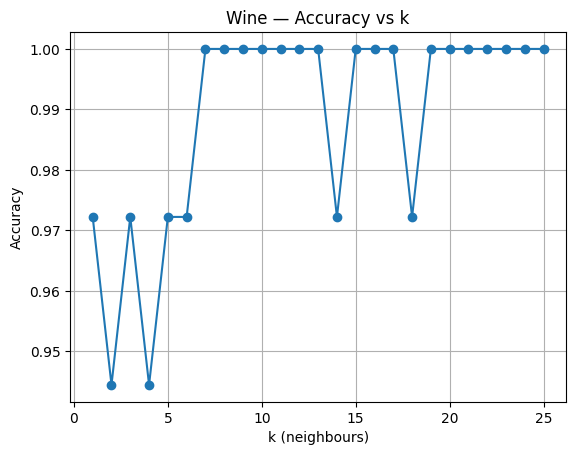

Predicted wine class: class_0


In [4]:

wine = load_wine()
df_wine = dataset_overview(wine.data, wine.feature_names, wine.target, wine.target_names, target_col="class")

X_w = df_wine.drop(columns=["class","class_name"]).values
y_w = df_wine["class"].values

Xw_tr, Xw_te, yw_tr, yw_te, scaler_w = split_scale(X_w, y_w, test_size=0.2)
model_w = fit_knn(Xw_tr, yw_tr, k=5)
evaluate(model_w, Xw_te, yw_te, target_names=wine.target_names)
_ = sweep_k(Xw_tr, Xw_te, yw_tr, yw_te, title="Wine — Accuracy vs k")

new_sample_w = np.array([[13.0, 2.0, 2.4, 16.0, 100.0,
                          2.8, 3.1, 0.3, 2.0, 5.0,
                          1.0, 3.0, 1000.0]])
pred_w = model_w.predict(scaler_w.transform(new_sample_w))[0]
print("Predicted wine class:", wine.target_names[pred_w])


## 4) Breast Cancer 🎗️

Shape: (569, 32)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class,class_name
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,...,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,0.63
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,...,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,0.48
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,...,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,0.00
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,...,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,0.00
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,...,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,1.00
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,...,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,1.00
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,...,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,1.00


Accuracy: 0.9532163742690059

Confusion Matrix:
 [[ 56   8]
 [  0 107]]

Classification Report:
               precision    recall  f1-score   support

   malignant       1.00      0.88      0.93        64
      benign       0.93      1.00      0.96       107

    accuracy                           0.95       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.95      0.95       171



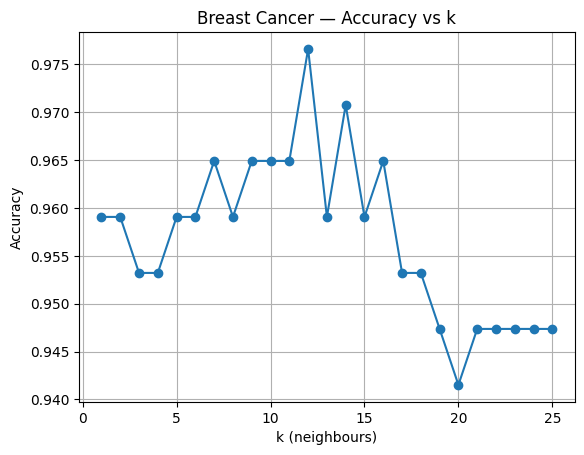

Predicted class: malignant


In [5]:

bc = load_breast_cancer()
df_bc = dataset_overview(bc.data, bc.feature_names, bc.target, bc.target_names, target_col="class")

X_b = df_bc.drop(columns=["class","class_name"]).values
y_b = df_bc["class"].values

Xb_tr, Xb_te, yb_tr, yb_te, scaler_b = split_scale(X_b, y_b, test_size=0.3)
model_b = fit_knn(Xb_tr, yb_tr, k=3)
evaluate(model_b, Xb_te, yb_te, target_names=bc.target_names)
_ = sweep_k(Xb_tr, Xb_te, yb_tr, yb_te, title="Breast Cancer — Accuracy vs k")

new_sample_b = np.array([[17.0, 10.0, 120.0, 1000.0, 0.10,
                          0.15, 0.20, 0.10, 0.20, 0.06,
                          0.50, 1.0, 3.0, 40.0, 0.006,
                          0.02, 0.02, 0.01, 0.02, 0.003,
                          20.0, 15.0, 140.0, 1200.0, 0.14,
                          0.30, 0.40, 0.20, 0.30, 0.08]])
pred_b = model_b.predict(scaler_b.transform(new_sample_b))[0]
print("Predicted class:", bc.target_names[pred_b])


## 5) Reflection ✍️


- Record your best **k** for each dataset.  
- Explain in 2–3 sentences why **scaling** matters for KNN.  
- For Breast Cancer, which matters more — **precision** or **recall** — and why?  
